In [1]:
import pytesseract
from pytesseract import Output
import cv2 
import matplotlib.pyplot as plt


In [2]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

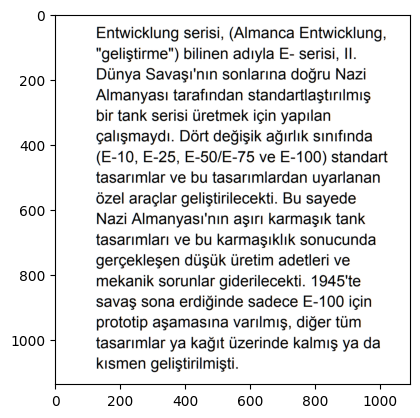

In [3]:
img = cv2.imread('wiki.png')

plt.imshow(img)


In [4]:
img2char = pytesseract.image_to_string(img, lang="tur")
print(img2char)

Entwicklung serisi, (Almanca Entwicklung,
"geliştirme") bilinen adıyla E- serisi, Il.
Dünya Savaşı'nın sonlarına doğru Nazi
Almanyası tarafından standartlaştırılmış
bir tank serisi üretmek için yapılan
çalışmaydı. Dört değişik ağırlık sınıfında
(E-10, E-25, E-50/E-75 ve E-100) standart
tasarımlar ve bu tasarımlardan uyarlanan
özel araçlar geliştirilecekti. Bu sayede
Nazi Almanyası'nın aşırı karmaşık tank
tasarımları ve bu karmaşıklık sonucunda
gerçekleşen düşük üretim adetleri ve
mekanik sorunlar giderilecekti. 1945'te
savaş sona erdiğinde sadece E-100 için
prototip aşamasına varılmış, diğer tüm
tasarımlar ya kağıt üzerinde kalmış ya da
kısmen geliştirilmişti.



In [5]:
imgbox = pytesseract.image_to_boxes(img, lang="tur")
print(imgbox)

E 129 1062 155 1097 0
n 134 1051 179 1097 0
t 160 1062 181 1088 0
w 185 1061 198 1096 0
i 198 1062 232 1088 0
c 235 1062 240 1097 0
k 244 1061 267 1088 0
l 270 1062 299 1097 0
u 304 1061 325 1088 0
n 309 1051 346 1097 0
g 331 1051 379 1088 0
s 396 1055 413 1097 0
e 396 1061 418 1088 0
r 420 1061 444 1088 0
i 448 1062 463 1088 0
s 464 1062 469 1097 0
i 474 1061 495 1088 0
, 499 1055 516 1097 0
( 536 1052 548 1097 0
A 549 1062 582 1097 0
l 584 1062 589 1097 0
m 595 1062 629 1088 0
a 633 1061 657 1088 0
n 638 1052 683 1097 0
c 661 1062 682 1088 0
a 687 1061 734 1088 0
E 753 1051 778 1097 0
n 753 1062 779 1097 0
t 784 1062 805 1088 0
w 808 1061 856 1096 0
i 831 1051 868 1097 0
c 859 1062 864 1097 0
k 868 1061 890 1088 0
l 893 1062 922 1097 0
u 928 1061 949 1088 0
n 955 1062 976 1088 0
g 957 1051 994 1097 0
, 980 1051 1015 1088 0
" 127 1020 141 1033 0
g 144 987 167 1024 0
e 150 987 186 1033 0
l 171 997 194 1024 0
i 199 998 214 1033 0
ş 219 989 240 1024 0
t 242 997 255 1032 0
i 257 998 262 1

In [6]:
type(imgbox)

str

In [7]:
img.shape

(1136, 1093, 3)

In [8]:
imgH , imgW = img.shape[:2]

### boxing by words

In [9]:
word_data = pytesseract.image_to_data(img, lang="tur", output_type=Output.DICT)
word_count = len(word_data["text"])
word_count


104

Entwicklung
serisi,
(Almanca
Entwicklung,
"geliştirme")
bilinen
adıyla
E-
serisi,
Il.
Dünya
Savaşı'nın
sonlarına
doğru
Nazi
Almanyası
tarafından
standartlaştırılmış
bir
tank
serisi
üretmek
için
yapılan
çalışmaydı.
Dört
değişik
ağırlık
sınıfında
(E-10,
E-25,
E-50/E-75
ve
E-100)
standart
tasarımlar
ve
bu
tasarımlardan
uyarlanan
özel
araçlar
geliştirilecekti.
Bu
sayede
Nazi
Almanyası'nın
aşırı
karmaşık
tank
tasarımları
ve
bu
karmaşıklık
sonucunda
gerçekleşen
düşük
üretim
adetleri
ve
mekanik
sorunlar
giderilecekti.
1945'te
savaş
sona
erdiğinde
sadece
E-100
için
prototip
aşamasına
varılmış,
diğer
tüm
tasarımlar
ya
kağıt
üzerinde
kalmış
ya
da
kısmen
geliştirilmişti.


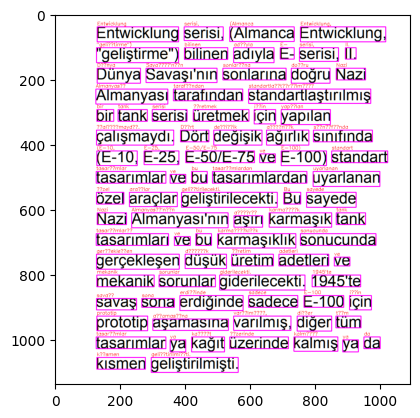

In [10]:
img_words = img.copy()

for idx, word in enumerate(word_data["text"]):
    if not word.strip():
        continue

    print(word)

    x = word_data["left"][idx]
    y = word_data["top"][idx]
    w = word_data["width"][idx]
    h = word_data["height"][idx]

    top_left = (x, y)
    bottom_right = (x + w, y + h)
    cv2.rectangle(img_words, top_left, bottom_right, (255, 0, 255), 2)
    cv2.putText(img_words, word, (x, y-5), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

plt.imshow(img_words)
plt.show()


### boxing by letters

In [28]:
img = cv2.imread('wiki.png')
imgH , imgW = img.shape[:2]

In [29]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x, y ,w, h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    cv2.rectangle(img, (x, imgH - y), (w, imgH - h), (0, 255, 0), 2)

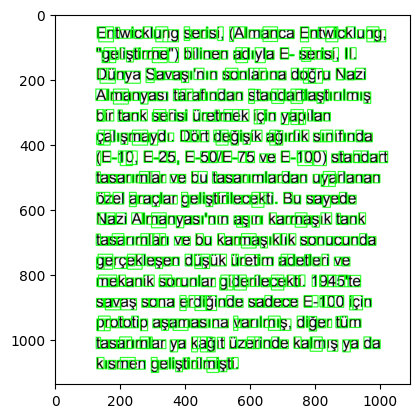

In [30]:
plt.imshow(img)